# Support Vector Machine Classifier

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
from sklearn.model_selection import train_test_split
x = df.iloc[:, [2,3]].values
y = df.iloc[:, -1].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.25, random_state=0)

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [8]:
from sklearn.svm import SVC
model = SVC(kernel = "linear")

In [9]:
model.fit(x_train, y_train)
y_preds = model.predict(x_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_preds)

<AxesSubplot:>

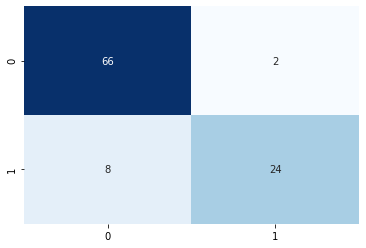

In [10]:
sns.heatmap(cm, cbar = False, cmap="Blues", annot=True)

(-2.5825424477554764, 3.3174575522445293)

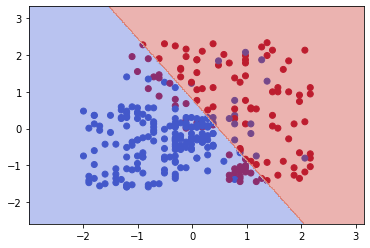

In [19]:
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap="coolwarm")
h = .02  # step size in the mesh
x_min, x_max = x_train[:, 0].min() - 1, x_train[:, 0].max() + 1
y_min, y_max = x_train[:, 1].min() - 1, x_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.4)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())